In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt

In [9]:
image_size = (200, 271)
batch_size = 12

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    labels="inferred",
    validation_split=0.2,
    subset="training",
    seed=2000,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "data",
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=2000,
    image_size=image_size,
    batch_size=batch_size,
)

Found 204 files belonging to 2 classes.
Using 164 files for training.
Found 204 files belonging to 2 classes.
Using 40 files for validation.


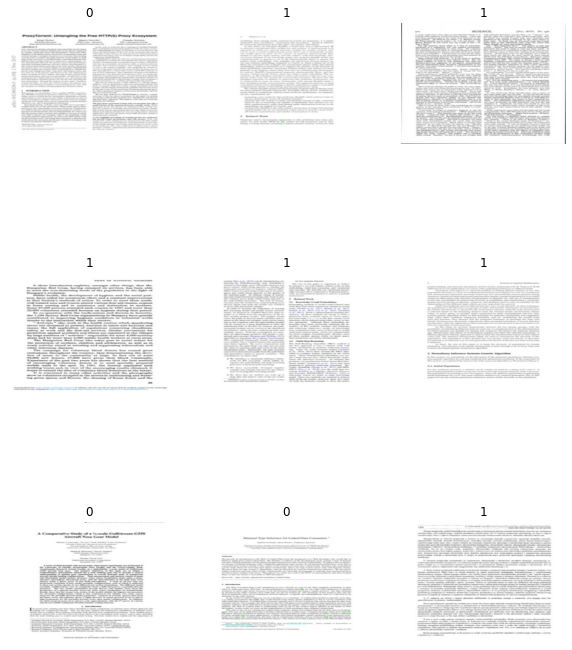

In [11]:
plt.figure(figsize=(10, 13))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [12]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [15]:
inputs = keras.Input(shape=(200, 271))

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 271, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 269, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 134, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 132, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 66, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 64, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 198, 269, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 134, 32)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 132, 64)       18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 66, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 64, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 188416)            0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=10, 
                    validation_data=val_ds)

Epoch 1/10
14/14 [==============================] - 8s 523ms/step - loss: 336.4895 - accuracy: 0.4634 - val_loss: 1.9709 - val_accuracy: 0.5250
Epoch 2/10
14/14 [==============================] - 7s 507ms/step - loss: 2.2013 - accuracy: 0.5183 - val_loss: 1.6707 - val_accuracy: 0.4750
Epoch 3/10
14/14 [==============================] - 7s 499ms/step - loss: 1.4398 - accuracy: 0.5244 - val_loss: 2.1598 - val_accuracy: 0.4750
Epoch 4/10
14/14 [==============================] - 7s 520ms/step - loss: 2.5393 - accuracy: 0.5000 - val_loss: 2.1615 - val_accuracy: 0.5000
Epoch 5/10
14/14 [==============================] - 7s 500ms/step - loss: 2.2774 - accuracy: 0.4939 - val_loss: 2.1096 - val_accuracy: 0.5250
Epoch 6/10
14/14 [==============================] - 7s 499ms/step - loss: 1.9333 - accuracy: 0.5305 - val_loss: 2.9275 - val_accuracy: 0.5250
Epoch 7/10
14/14 [==============================] - 7s 521ms/step - loss: 1.9891 - accuracy: 0.5122 - val_loss: 1.8974 - val_accuracy: 0.5500
Epoc